In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
critics = {
    "Lisa Rose": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "Superman Returns": 3.5,
        "You, Me and Dupree": 2.5,
        "The Night Listener": 3.0,
    },
    "Gene Seymour": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 1.5,
        "Superman Returns": 5.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 3.5,
    },
    "Michael Phillips": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.0,
        "Superman Returns": 3.5,
        "The Night Listener": 4.0,
    },
    "Claudia Puig": {
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "The Night Listener": 4.5,
        "Superman Returns": 4.0,
        "You, Me and Dupree": 2.5,
    },
    "Mick LaSalle": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "Just My Luck": 2.0,
        "Superman Returns": 3.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 2.0,
    },
    "Jack Matthews": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "The Night Listener": 3.0,
        "Superman Returns": 5.0,
        "You, Me and Dupree": 3.5,
    },
    "Toby": {
        "Snakes on a Plane": 4.5,
        "You, Me and Dupree": 1.0,
        "Superman Returns": 4.0,
    },
}

In [3]:
critics["Lisa Rose"]

{'Lady in the Water': 2.5,
 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0,
 'Superman Returns': 3.5,
 'You, Me and Dupree': 2.5,
 'The Night Listener': 3.0}

In [4]:
from math import sqrt

sqrt(pow(4.5 - 4, 2) + pow(1 - 2, 2))

1.118033988749895

In [5]:
1 / sqrt(pow(4.5 - 4, 2) + pow(1 - 2, 2))

0.8944271909999159

欧几里德相似度

$$\frac{1}{1 + \sqrt{(x_1 - x_2)^2 + （y_1 - y_2)^2}}$$

这一函数总是返回0~1的值，返回1表示两人具有一样的偏好

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

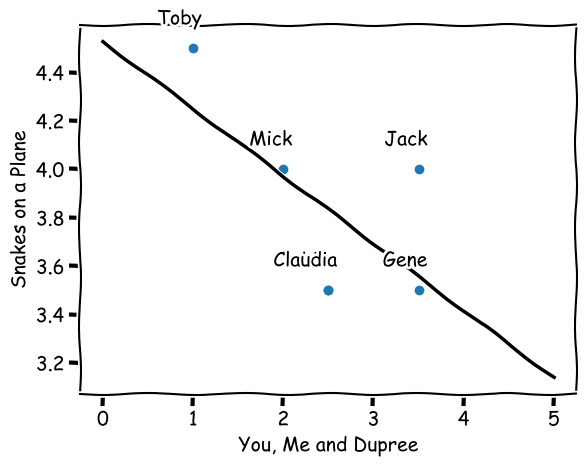

In [6]:
x = []
y = []
users = []
for user, item in critics.items():
    added = False
    for m, s in item.items():
        if "Snakes on a Plane" not in item or "You, Me and Dupree" not in item:
            continue
        if not added:
            users.append(user)
            added = True
        match m:
            case "Snakes on a Plane":
                y.append(s)
            case "You, Me and Dupree":
                x.append(s)
            case _:
                pass
with plt.xkcd():
    plt.scatter(x, y)
    b, a = np.polyfit(x, y, deg=1)
    xseq = np.linspace(0, 5, num=100)
    plt.plot(xseq, a + b * xseq, color="k", lw=2.5)
    plt.xlabel("You, Me and Dupree")
    plt.ylabel("Snakes on a Plane")
    for x, y, user in zip(x, y, users):
        plt.text(x + 0.1, y + 0.1, user.split()[0], ha="right")

In [7]:
# 返回person1和person2基于距离的相似度评价
def sim_distance(
    prefs: dict[str, dict[str, float]], person1: str, person2: str
) -> float:
    # 得到共同评价过得列表
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item] = 1

    # 如果两者没有共同之处，返回0
    if not si:
        return 0

    # 计算平方和
    sum_of_squares = sum(
        [
            pow(prefs[person1][item] - prefs[person2][item], 2)
            for item in prefs[person1]
            if item in prefs[person2]
        ]
    )

    return 1 / (1 + sqrt(sum_of_squares))

In [8]:
sim_distance(critics, "Lisa Rose", "Gene Seymour")

0.29429805508554946

皮尔逊相关系数

$$\rho_{X, Y}=\frac{\operatorname{cov}(X, Y)}{\sigma_X \sigma_Y}=\frac{E\left[\left(X-\mu_X\right)\left(Y-\mu_Y\right)\right]}{\sigma_X \sigma_Y}$$

判断两组数据与某一直线拟合程度的度量。比上面的欧几里德距离要复杂，但是在数据不是很规范（如含有异常值）倾向给出更好的结果。

In [9]:
def sim_pearson(
    prefs: dict[str, dict[str, float]], person1: str, person2: str
) -> float:
    # 得到双方都评价过得物品列表
    si = {}

    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item] = 1

    if not si:
        return 1

    sum1 = sum([prefs[person1][it] for it in si])
    sum2 = sum([prefs[person2][it] for it in si])

    sum1sq = sum([pow(prefs[person1][it], 2) for it in si])
    sum2sq = sum([pow(prefs[person2][it], 2) for it in si])

    psum = sum([prefs[person1][it] * prefs[person2][it] for it in si])

    n = len(si)
    num = psum - (sum1 * sum2 / n)
    den = sqrt((sum1sq - pow(sum1, 2) / n) * (sum2sq - pow(sum2, 2) / n))
    if den == 0:
        return 0

    r = num / den
    return r

In [10]:
sim_pearson(critics, "Lisa Rose", "Gene Seymour")

0.39605901719066977

In [11]:
# 从反映偏好的字典中返回最佳匹配者
def top_matches(
    prefs: dict[str, dict[str, float]],
    person: str,
    n: int = 5,
    similarity: callable = sim_pearson,
) -> list[tuple[float, str]]:
    scores = [
        (similarity(prefs, person, other), other) for other in prefs if other != person
    ]

    scores.sort(reverse=True)
    return scores[0:n]

In [12]:
top_matches(critics, "Toby", n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

In [13]:
top_matches(critics, "Toby", n=3, similarity=sim_distance)

[(0.4, 'Mick LaSalle'),
 (0.38742588672279304, 'Michael Phillips'),
 (0.3567891723253309, 'Claudia Puig')]

In [14]:
def get_recommendations(
    prefs: dict[str, dict[str, float]], person: str, similarity: callable = sim_pearson
) -> list[tuple[float, str]]:
    totals = {}
    sim_sums = {}
    for other in prefs:
        # 不和自己比较
        if other == person:
            continue
        sim = similarity(prefs, person, other)
        # 忽略评价值小与0的情况，什么时候出现这种情况？
        if sim <= 0:
            continue
        for item in prefs[other]:
            # 只对自己还未看过的影片评价
            if item not in prefs[person] or prefs[person][item] == 0:
                totals.setdefault(item, 0)
                totals[item] += prefs[other][item] * sim
                sim_sums.setdefault(item, 0)
                sim_sums[item] += sim

    # 建立一个归一化的列表
    rankings = [(total / sim_sums[item], item) for item, total in totals.items()]

    rankings.sort(reverse=True)
    return rankings

In [15]:
get_recommendations(critics, "Toby")

[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [16]:
get_recommendations(critics, "Toby", similarity=sim_distance)

[(3.457128694491423, 'The Night Listener'),
 (2.778584003814924, 'Lady in the Water'),
 (2.422482042361917, 'Just My Luck')]

In [17]:
def transform_prefs(prefs: dict[str, dict[str, float]]) -> dict[str, dict[str, float]]:
    result = {}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item, {})
            result[item][person] = prefs[person][item]

    return result

In [18]:
movies = transform_prefs(critics)

In [19]:
top_matches(movies, "Superman Returns")

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

评分为负数的说明喜欢Superman Returns的人，存在不喜欢Just My Luck的倾向。上面为影片推荐相关影片，我们还可以为影片推荐评论者。例如，也许我们正在考虑邀请谁和自己一起参加某部影片的首映式。

In [20]:
get_recommendations(movies, "Just My Luck")

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

以上是UserCF，下面是ItemCF

In [21]:
def calculate_similar_items(
    prefs: dict[
        str,
        dict[str, float],
    ],
    n: int = 10,
) -> dict[str, list[tuple[float, str]]]:
    result = {}

    item_prefs = transform_prefs(prefs)
    c = 0
    for item in item_prefs:
        c += 1
        if c % 100 == 0:
            print(f"{c} / {len(item_prefs)}")
        scores = top_matches(item_prefs, item, n=n, similarity=sim_distance)
        result[item] = scores

    return result

In [22]:
itemsim = calculate_similar_items(critics)
itemsim
# 结果和书本不一样，对了好几遍代码，没发现哪里错了

{'Lady in the Water': [(0.4494897427831781, 'You, Me and Dupree'),
  (0.38742588672279304, 'The Night Listener'),
  (0.3483314773547883, 'Snakes on a Plane'),
  (0.3483314773547883, 'Just My Luck'),
  (0.2402530733520421, 'Superman Returns')],
 'Snakes on a Plane': [(0.3483314773547883, 'Lady in the Water'),
  (0.32037724101704074, 'The Night Listener'),
  (0.3090169943749474, 'Superman Returns'),
  (0.2553967929896867, 'Just My Luck'),
  (0.1886378647726465, 'You, Me and Dupree')],
 'Just My Luck': [(0.3483314773547883, 'Lady in the Water'),
  (0.32037724101704074, 'You, Me and Dupree'),
  (0.2989350844248255, 'The Night Listener'),
  (0.2553967929896867, 'Snakes on a Plane'),
  (0.20799159651347807, 'Superman Returns')],
 'Superman Returns': [(0.3090169943749474, 'Snakes on a Plane'),
  (0.252650308587072, 'The Night Listener'),
  (0.2402530733520421, 'Lady in the Water'),
  (0.20799159651347807, 'Just My Luck'),
  (0.1918253663634734, 'You, Me and Dupree')],
 'You, Me and Dupree': [

In [23]:
def get_recommended_items(
    prefs: dict[str, dict[str, float]],
    item_match: dict[str, list[tuple[float, str]]],
    user: str,
) -> list[tuple[float, str]]:
    user_ratings = prefs[user]
    scores = {}
    total_sim = {}

    for item, rating in user_ratings.items():
        for similarity, item2 in item_match[item]:
            if item2 in user_ratings:
                continue
            scores.setdefault(item2, 0)
            scores[item2] += similarity * rating

            total_sim.setdefault(item2, 0)
            total_sim[item2] += similarity

    rankings = [(score / total_sim[item], item) for item, score in scores.items()]
    rankings.sort(reverse=True)
    return rankings

In [24]:
get_recommended_items(critics, itemsim, "Toby")

[(3.1667425234070894, 'The Night Listener'),
 (2.9366294028444346, 'Just My Luck'),
 (2.868767392626467, 'Lady in the Water')]

In [25]:
def load_movie_lens(path: str = "movielens") -> dict[str, float]:
    movies = {}
    for line in open(f"{path}/u.item", encoding="ISO-8859-1"):
        id, title = line.split("|")[0:2]
        movies[id] = title

    prefs = {}
    for line in open(f"{path}/u.data", encoding="ISO-8859-1"):
        user, movieid, rating, ts = line.split("\t")
        prefs.setdefault(user, {})
        prefs[user][movies[movieid]] = float(rating)
    return prefs

In [26]:
prefs = load_movie_lens()
prefs["87"]

{'Naked Gun 33 1/3: The Final Insult (1994)': 4.0,
 'Con Air (1997)': 4.0,
 'Sabrina (1995)': 4.0,
 'Waterworld (1995)': 4.0,
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)': 3.0,
 'Clueless (1995)': 4.0,
 'Jurassic Park (1993)': 5.0,
 'Brady Bunch Movie, The (1995)': 2.0,
 'Son in Law (1993)': 4.0,
 'Indiana Jones and the Last Crusade (1989)': 5.0,
 'Good, The Bad and The Ugly, The (1966)': 5.0,
 'Dead Poets Society (1989)': 5.0,
 'Dead Man Walking (1995)': 4.0,
 "Joe's Apartment (1996)": 2.0,
 'GoldenEye (1995)': 4.0,
 'M*A*S*H (1970)': 5.0,
 'Something to Talk About (1995)': 2.0,
 'Lightning Jack (1994)': 3.0,
 'Big Green, The (1995)': 3.0,
 'Cowboy Way, The (1994)': 3.0,
 "Ulee's Gold (1997)": 3.0,
 'Addams Family Values (1993)': 2.0,
 '2001: A Space Odyssey (1968)': 5.0,
 'Platoon (1986)': 3.0,
 'Return of the Pink Panther, The (1974)': 4.0,
 'Four Weddings and a Funeral (1994)': 5.0,
 'Under Siege (1992)': 4.0,
 'Ace Ventura: Pet Detective (1994)': 4.0,
 'Die Hard: Wit

In [27]:
# 基于用户的推荐
get_recommendations(prefs, "87")[:30]

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)'),
 (5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (5.0, 'Boys, Les (1997)'),
 (4.89884443128923, 'Legal Deceit (1997)'),
 (4.815019082242709, 'Letter From Death Row, A (1998)'),
 (4.800260666069042, 'Mrs. Dalloway (1997)'),
 (4.771240079753505, 'Leading Man, The (1996)'),
 (4.7321082983941425, 'Hearts and Minds (1996)'),
 (4.707354190896574, 'Dangerous Beauty (1998)'),
 (4.696244466490867, 'Pather Panchali (1955)'),
 (4.652397061026758, 'Lamerica (1994)'),
 (4.532337612572981, 'Innocents, The (1961)'),
 (4.527998574747076, 'Casablanca (1942)'),
 (4.512903125553784, 'Four Days in September (1997)'),
 (4.510270149719864, 'Everest (1998)'),
 (4.485151301801341, 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (4.463287461

In [28]:
# 基于物品的推荐
itemsim = calculate_similar_items(prefs, n=50)

100 / 1664
200 / 1664
300 / 1664
400 / 1664
500 / 1664
600 / 1664
700 / 1664
800 / 1664
900 / 1664
1000 / 1664
1100 / 1664
1200 / 1664
1300 / 1664
1400 / 1664
1500 / 1664
1600 / 1664


In [29]:
get_recommended_items(prefs, itemsim, "87")[:30]

[(5.0, "What's Eating Gilbert Grape (1993)"),
 (5.0, 'Vertigo (1958)'),
 (5.0, 'Usual Suspects, The (1995)'),
 (5.0, 'Toy Story (1995)'),
 (5.0, 'Titanic (1997)'),
 (5.0, 'Sword in the Stone, The (1963)'),
 (5.0, 'Stand by Me (1986)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Silence of the Lambs, The (1991)'),
 (5.0, 'Shining, The (1980)'),
 (5.0, 'Shine (1996)'),
 (5.0, 'Sense and Sensibility (1995)'),
 (5.0, 'Scream (1996)'),
 (5.0, 'Rumble in the Bronx (1995)'),
 (5.0, 'Rock, The (1996)'),
 (5.0, 'Robin Hood: Prince of Thieves (1991)'),
 (5.0, 'Reservoir Dogs (1992)'),
 (5.0, 'Police Story 4: Project S (Chao ji ji hua) (1993)'),
 (5.0, 'House of the Spirits, The (1993)'),
 (5.0, 'Fresh (1994)'),
 (5.0, 'Denise Calls Up (1995)'),
 (5.0, 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)'),
 (5.0, 'Before the Rain (Pred dozhdot) (1994)'),
 (5.0, 'Assignment, The (1997)'),
 (5.0, '1-900 (1994)'),
 (4.875, "Ed's Next Move (1996)"),
 (4.833333333333333, 'Anna (1996)'),
 (4.8, 'Dark City 